<a href="https://colab.research.google.com/github/mohamedFayek2005/Ai_platform_/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                  train=True,
                                                  transform=transform,
                                                  download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                 train=False,
                                                 transform=transform)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=64,
                                          shuffle=True) #

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.17MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 118kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.22MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.3MB/s]


In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 128)
        self.final = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (final): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

print("--- train is end---")

Epoch 1/10, Loss: 0.2219401884720778
Epoch 2/10, Loss: 0.21091674921958686
Epoch 3/10, Loss: 0.20422684248767173
Epoch 4/10, Loss: 0.1949390019776661
Epoch 5/10, Loss: 0.1899506487627464
Epoch 6/10, Loss: 0.18128660311703998
Epoch 7/10, Loss: 0.1771694601082535
Epoch 8/10, Loss: 0.16950820573865732
Epoch 9/10, Loss: 0.16477820913353042
Epoch 10/10, Loss: 0.16055291100367428
--- train is end---


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        for idx, i in enumerate(outputs):
            if torch.argmax(i) == labels[idx]:
                correct += 1
            total += 1

train_accuracy = round(correct/total, 3) * 100
print(f'Final Training Accuracy: {train_accuracy}%')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = round(correct/total, 3) * 100
print(f'Final Test Accuracy: {test_accuracy}%')

Final Training Accuracy: 91.7%
Final Test Accuracy: 88.0%


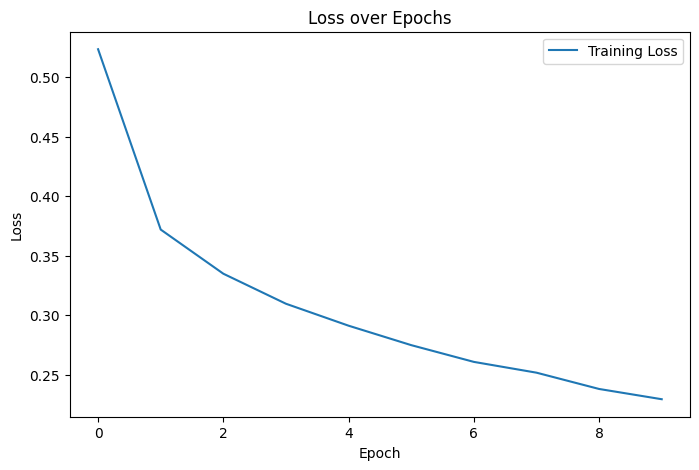

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [8]:
y_pred = []
y_true = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[726   1  14  17   3   1 229   0   9   0]
 [  0 974   0  18   3   0   4   0   1   0]
 [ 11   0 787   7  97   0  97   0   1   0]
 [ 15   7  16 871  37   0  52   0   2   0]
 [  0   0  80  31 810   0  78   0   1   0]
 [  0   0   0   0   0 946   0  33   1  20]
 [ 63   1  68  24  53   0 782   0   9   0]
 [  0   0   0   0   0   3   0 975   0  22]
 [  5   0   2   2   1   2   9   4 975   0]
 [  0   0   0   0   0   5   1  39   0 955]]


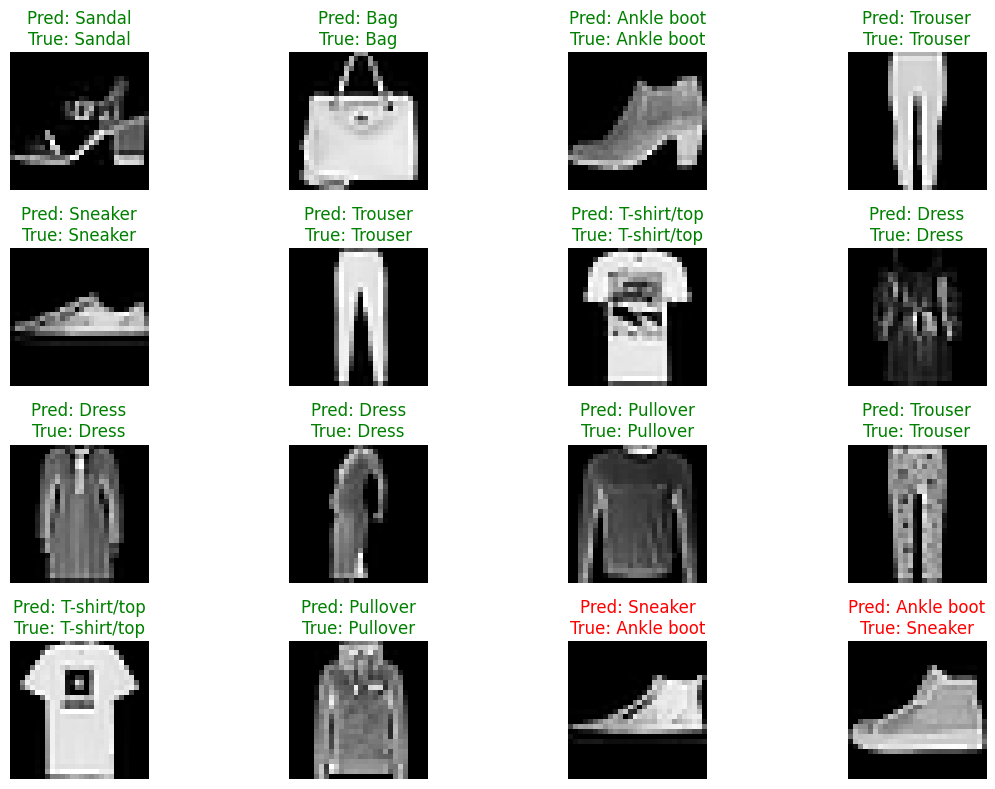

In [9]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    color = 'green' if predicted[i] == labels[i] else 'red'
    plt.title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()